# **Phân tích dữ liệu cho bài toán Titanic**

**Phân loại (Classifying):**

Mục tiêu: Phân loại hoặc nhóm các mẫu dữ liệu.

**Tương quan (Correlating):**

Mục tiêu: Xác định sự tương quan giữa các đặc trưng dữ liệu và mục tiêu của giải pháp.

**Chuyển đổi (Converting):**

Mục tiêu: Chuẩn bị dữ liệu cho việc mô hình hóa.

**Hoàn thiện (Completing):**

Mục tiêu: Ước lượng giá trị bị thiếu trong các đặc trưng.

**Sửa lỗi (Correcting):**

Mục tiêu: Phân tích tập dữ liệu đào tạo để xác định lỗi hoặc giá trị không chính xác.

**Tạo mới (Creating):**

Mục tiêu: Tạo ra các đặc trưng mới dựa trên đặc trưng hiện tại.

**Vẽ đồ thị (Charting):**

Mục tiêu: Lựa chọn đồ thị và biểu đồ phù hợp với tính chất của dữ liệu và mục tiêu giải pháp.

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TH1-CS116/train.csv')

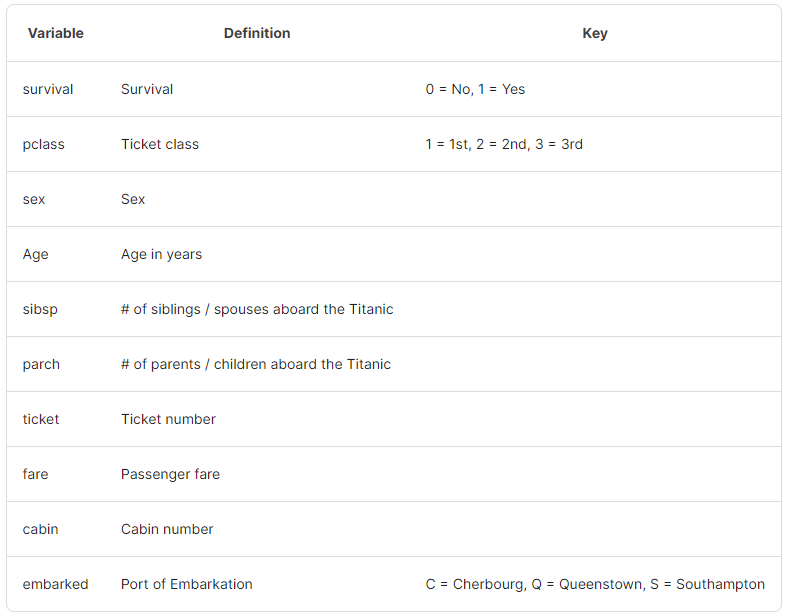

In [4]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Những đặc trưng nào ở dạng phân loại?

Những đặc trưng nào ở dạng số?

Những đặc trưng nào trỗn lẫn giữa chữ và số?

Những đặc trưng nào có thể có lỗi hoặc lỗi chính tả?

Những đặc trưng nào chứa giá trị là ô trống (null)?

Kiểu dữ liệu của các đặc trưng?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Correlating.

Kiểm tra mức độ tương quan của từng đặc trưng với "Survival".

#Converting

#Completing.

Điền thông tin vào các ô chứa giá trị "null", mà tại đó đặc trưng được xem là quan trọng.

#Correcting.

Có thể loại bỏ các đặc trưng không cần thiết.

#Correcting.

Có thể loại bỏ các đặc trưng không cần thiết.

#Creating.
Tạo các đặc trưng mới từ những đặc trưng có sẵn

-------Correlating.-------


In [11]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


-------Visualize-------

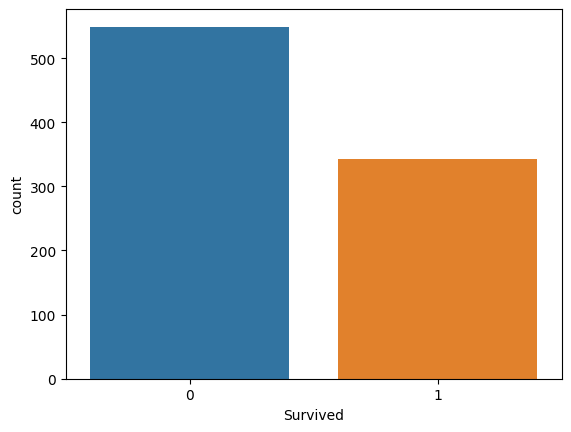

In [12]:
sns.countplot(x=df['Survived']);

<Axes: xlabel='Pclass', ylabel='count'>

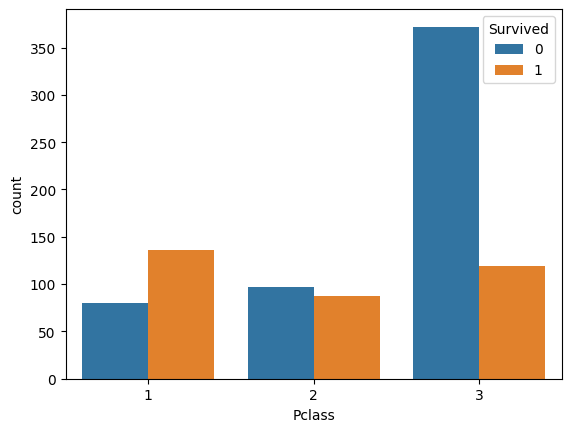

In [13]:
sns.countplot(x=df['Pclass'], hue=df['Survived'])

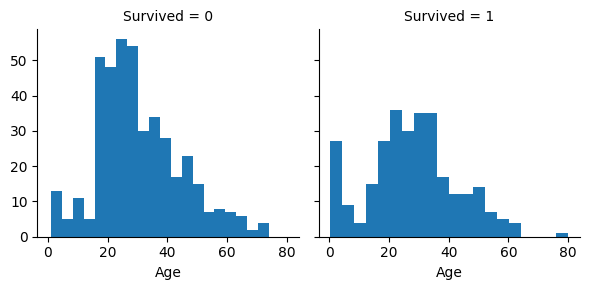

In [15]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<Axes: xlabel='Pclass', ylabel='Survived'>

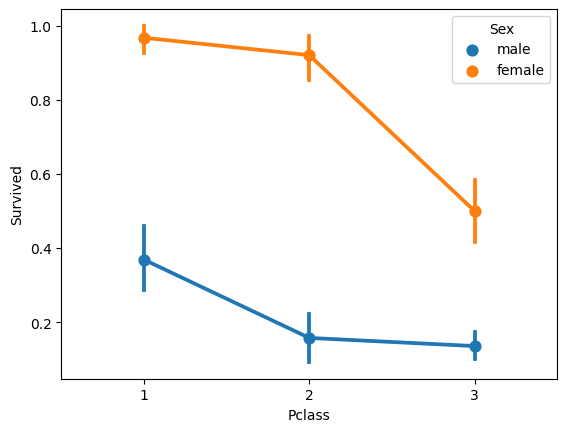

In [20]:
sns.pointplot(hue = df['Sex'],
              x = df['Pclass'],
              y = df['Survived'])